In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os,sys
import h5py, json
import pickle as pkl
import time

import nept
sys.path.append('../PreProcessing/')
sys.path.append('../TrackingAnalyses/')
sys.path.append('../Lib/')
sys.path.append('../Analyses/')

from importlib import reload  # Python 3.4+ only.
import pre_process_neuralynx as PPN
import TreeMazeFunctions as TMF
import spike_functions as SF
import spatial_tuning as ST
import stats_functions as StatsF
import plot_functions as PF
import zone_analyses_session as ZA

In [2]:
oakPaths = {}
oakPaths['Root'] = Path('/mnt/o/giocomo/alexg/')
oakPaths['Clustered'] = Path('/mnt/o/giocomo/alexg/Clustered/')
oakPaths['PreProcessed'] = Path('/mnt/o/giocomo/alexg/PreProcessed/')
oakPaths['Raw'] = Path('/mnt/o/giocomo/alexg/RawData/InVivo/')
oakPaths['Analyses'] = Path('/mnt/o/giocomo/alexg/Analyses')

In [8]:
ZA=reload(ZA)
SF=reload(SF)
TMF=reload(TMF)
animal = 'Li'
task = 'T3g'

CT_Path =  oakPaths['Clustered'] / animal / (animal+'_ClusteringSummary.json')
ZoneDat_Fn = oakPaths['Analyses'] / animal / ('{}_{}_ZoneAnalysesDat.pkl').format(animal,task)
plotSP = oakPaths['Analyses'] / animal / 'Plots'

with CT_Path.open() as f:
    CT = json.load(f)

SessionList = []
SessionPaths = {}
ZoneDat = {}
overwrite=1

cnt=0
if (not ZoneDat_Fn.exists())|overwrite:
    for se,v in CT['Sessions'].items():
        if v:
            temp = se.split('_')
            if temp[1]==task:
                try:
                    SessionList.append(se)
                    SessionPaths[se]=ZA.getSessionPaths(oakPaths,se)
                    ZoneDat[se]=ZA.zone_analyses(se,overwrite,doPlots=0)
                    #ZoneDat[se]=ZA.zone_analyses(se,overwrite=0,doPlots=1)
                except:
                    print("Error processing session: {}".format(se))
                cnt+=1
                
    ZoneDat['Sessions'] = SessionList
    ZoneDat['SessionPaths'] = SessionPaths
    
    with ZoneDat_Fn.open(mode='wb') as f:
        pkl.dump(ZoneDat,f,pkl.HIGHEST_PROTOCOL)

else:
    with ZoneDat_Fn.open(mode='rb') as f:
        ZoneDat = pkl.load(f)
    


Starting Analyses for Sesssion Li_T3g_052818
Starting Zone Analyses.
Computing Position Data.
Smoothing track data completed: 10.28 s 
Resampling the Data to 0.02 seconds completed: 0.01 s 
Computing Event Data.
Comrrecting Positions with Event Info.
Creating Position Data Structure.
Converting Track x,y to TreeMaze Positions Completed: 3.87 s
Creating Position Matrix Completed : 0.00 s
Creating Segment Direction Matrix Complete: 1.19 s
Processing of Position Data Complete : 5.07 s
Behavioral Tracking Variables Computed and Saved.
Loading Spikes...
Binned Spike Files Loaded.
Loading FRs ...
FR Loaded.
Zone Analyses Completed

Starting Analyses for Sesssion Li_T3g_052918
Starting Zone Analyses.
Computing Position Data.
Smoothing track data completed: 17.51 s 
Resampling the Data to 0.02 seconds completed: 0.02 s 
Computing Event Data.
Comrrecting Positions with Event Info.
Creating Position Data Structure.
Converting Track x,y to TreeMaze Positions Completed: 7.50 s
Creating Position M

In [4]:
SessionList

['Li_T3g_052818',
 'Li_T3g_052918',
 'Li_T3g_053018',
 'Li_T3g_053118',
 'Li_T3g_060118',
 'Li_T3g_060418',
 'Li_T3g_061318',
 'Li_T3g_061518',
 'Li_T3g_061818',
 'Li_T3g_062018',
 'Li_T3g_062518',
 'Li_T3g_062618',
 'Li_T3g_062718',
 'Li_T3g_062818',
 'Li_T3g_070218',
 'Li_T3g_070518',
 'Li_T3g_070618',
 'Li_T3g_070918',
 'Li_T3g_071018',
 'Li_T3g_071118',
 'Li_T3g_072518',
 'Li_T3g_072618',
 'Li_T3g_073018',
 'Li_T3g_080118',
 'Li_T3g_080218',
 'Li_T3g_080318',
 'Li_T3g_080618',
 'Li_T3g_080718']

In [522]:
se = 'Li_T3g_062718'
ZoneDat[se]=ZA.zone_analyses(se,overwrite=1,doPlots=1)


Starting Analyses for Sesssion Li_T3g_062718
Starting Zone Analyses.
Computing Position Data.
Smoothing track data completed: 24.73 s 
Resampling the Data to 0.02 seconds completed: 0.02 s 
Converting Track x,y to TreeMaze Positions Completed: 10.24 s
Creating Position Matrix Completed : 10.27 s
Creating Segment Direction Matrix Complete: 8.58 s
Processing of Position Data Complete : 43.60 s
Computing Event Data.
Behavioral Tracking Variables Computed and Saved.
Loading Spikes...
Binned Spike Files Loaded.
Loading FRs ...
FR Loaded.


../Analyses/stats_functions.py:17: RuntimeWarning: divide by zero encountered in log2
  InfoMat = fr_map*loc_prob*np.log2(fr_map/meanFR)


Zone Analyses Completed



In [5]:
SessionList

['Li_T3g_052818',
 'Li_T3g_052918',
 'Li_T3g_053018',
 'Li_T3g_053118',
 'Li_T3g_060118',
 'Li_T3g_060418',
 'Li_T3g_061318',
 'Li_T3g_061518',
 'Li_T3g_061818',
 'Li_T3g_062018',
 'Li_T3g_062518',
 'Li_T3g_062618',
 'Li_T3g_062718',
 'Li_T3g_062818',
 'Li_T3g_070218',
 'Li_T3g_070518',
 'Li_T3g_070618',
 'Li_T3g_070918',
 'Li_T3g_071018',
 'Li_T3g_071118',
 'Li_T3g_072518',
 'Li_T3g_072618',
 'Li_T3g_073018',
 'Li_T3g_080118',
 'Li_T3g_080218',
 'Li_T3g_080318',
 'Li_T3g_080618',
 'Li_T3g_080718']

In [455]:
plotSP = oakPaths['Analyses'] / animal / 'Plots'
plotSP.mkdir(parents=True, exist_ok=True)


In [9]:
ZonePairStr =ZoneDat[SessionList[0]]['ZonePairs_Str']
nPairs = len(ZonePairStr)
FRxZoneCorr=pd.DataFrame(np.zeros((0,nPairs)))
FRxZoneCorr.columns=ZonePairStr

UnitInfoFields = ['se','seNum','Unit','HalfCorr','HalfnRMSE','Si']
UnitInfo=pd.DataFrame(np.zeros((0,len(UnitInfoFields))))
UnitInfo.columns=UnitInfoFields

seCnt =0
unitCnt = 0
cellCnt=0
muaCnt=0
seV = []
seNumV = []

uTypeV = []
siV =[]
halfCorrV =[]
halfnRMSEV = []
zcV =[]

pairsV=[]
unitIDV = []
for se in SessionList:
    
    CellCorr = ZoneDat[se]['FR_CorrZonePairs']['Cells']
    nSeCells = CellCorr.shape[0]
    MuaCorr = ZoneDat[se]['FR_CorrZonePairs']['Mua']
    nSeMua = MuaCorr.shape[0]
    nSeUnits = nSeCells+nSeMua
    
    #seV+=[se]*nSeUnits
    #seNumV+=[seCnt]*nSeUnits

    seV+=[se]*nPairs*nSeUnits
    seNumV+=[seCnt]*nSeUnits*nPairs
    
    FRxZoneCorr=FRxZoneCorr.append(CellCorr)
    FRxZoneCorr=FRxZoneCorr.append(MuaCorr)
    zcV+=np.array(CellCorr).flatten().tolist()
    zcV+=np.array(MuaCorr).flatten().tolist()
    
    #unitV+=['cell']*nSeCells
    #unitV+=['mua']*nSeMua
    uTypeV+=['cell']*nSeCells*nPairs
    uTypeV+=['mua']*nSeMua*nPairs
    
    unitIDV+= (np.repeat(np.arange(nPairs),nSeUnits)+unitCnt).tolist()
    #halfCorrV+=ZoneDat[se]['ZoneStability']['Cells']['HalfCorr'].tolist()
    #halfCorrV+=ZoneDat[se]['ZoneStability']['Mua']['HalfCorr'].tolist()
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Cells']['HalfCorr'],nPairs).tolist()
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Mua']['HalfCorr'],nPairs).tolist()
    
    #halfnRMSEV+=ZoneDat[se]['ZoneStability']['Cells']['HalfnRMSE'].tolist()
    #halfnRMSEV+=ZoneDat[se]['ZoneStability']['Mua']['HalfnRMSE'].tolist()
    halfnRMSEV+=np.repeat(ZoneDat[se]['ZoneStability']['Cells']['HalfnRMSE'],nPairs).tolist()
    halfnRMSEV+=np.repeat(ZoneDat[se]['ZoneStability']['Mua']['HalfnRMSE'],nPairs).tolist()
    
    #siV+=(ZoneDat[se]['SI_Zone']['Cells']['All'].tolist())
    #siV+=(ZoneDat[se]['SI_Zone']['Mua']['All'].tolist())
    siV+=np.repeat(ZoneDat[se]['SI_Zone']['Cells']['All'],nPairs).tolist()
    siV+=np.repeat(ZoneDat[se]['SI_Zone']['Mua']['All'],nPairs).tolist()
    
    pairsV+=ZonePairStr*nSeUnits
    seCnt+=1
    unitCnt+=nSeUnits
    cellCnt+=nSeCells
    muaCnt+=nSeMua
FRxZoneCorr.reset_index(drop=True)

UnitInfoFields = ['zc','zcf','se','seNum','uType','unitID','halfCorr','halfnRMSE','SI','zcPairs']
UnitInfo=pd.DataFrame(np.zeros((0,len(UnitInfoFields))))
UnitInfo.columns=UnitInfoFields

UnitInfo['zc'] =zcV
UnitInfo['zcf'] = np.arctanh(zcV)
UnitInfo['zcf'][np.abs(UnitInfo['zcf'])==np.inf]=np.nan
UnitInfo['se'] =seV
UnitInfo['seNum']=seNumV
UnitInfo['uType'] = uTypeV
UnitInfo['unitID'] = unitIDV
UnitInfo['halfCorr'] = halfCorrV
UnitInfo['halfnRMSE'] = halfnRMSEV
UnitInfo['SI'] = siV
UnitInfo['zcPairs'] = pairsV

StabUnitInfo = UnitInfo.loc[np.logical_and(UnitInfo['halfCorr']>0.5,~np.isnan(UnitInfo['zcf']))]
#FRCorrZPairs = pd.DataFrame((np.zeros(0,6)))
#list(ZoneDat[se].keys())
#ZoneDat[se]['FR_CorrZonePairs']['Cells']
#x=pd.DataFrame(np.zeros((0,5)))

/home/alexg8/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in arctanh


In [11]:
def zCorrPairBoxPlot(dat,ax):
   
    with sns.axes_style('whitegrid'):
        ax=sns.boxplot(x='zcPairs',y='zc',hue='uType',data=dat,ax=ax,color='lightgrey')
        ax.get_legend().remove()
        ax=sns.stripplot(x='zcPairs',y='zc',hue='uType',palette="Set2",data=dat,ax=ax,dodge=True,alpha=0.6)
        ax.set_ylim([-1.1,1.1])
        sns.despine(offset=10, trim=False,ax=ax)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        ax.grid(axis='both',color='grey',alpha=0.4)
        ax.set_ylabel(' Kendalls τ ')
        ax.set_xlabel(' Data Pairings ')
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[2:], labels[:2])


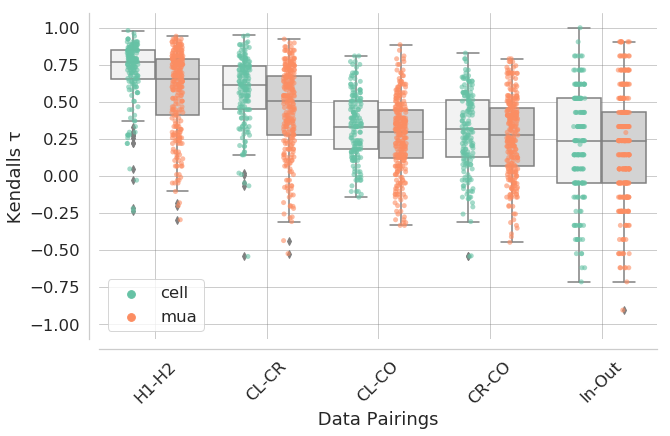

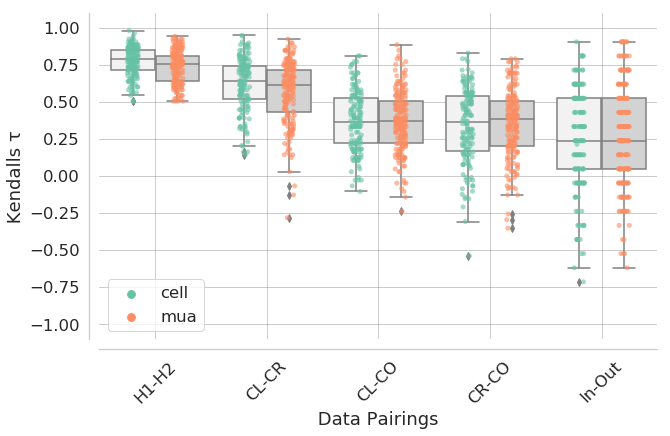

In [21]:
f,ax = plt.subplots(figsize=(10,6))
zCorrPairBoxPlot(UnitInfo,ax)
f.savefig(plotSP / 'all_units_ZoneDatCorr.pdf', bbox_inches='tight',pad_inches=0.2)
f,ax = plt.subplots(figsize=(10,6))
zCorrPairBoxPlot(StabUnitInfo,ax)
f.savefig(plotSP / 'stab_units_ZoneDatCorr.pdf', bbox_inches='tight',pad_inches=0.2)

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



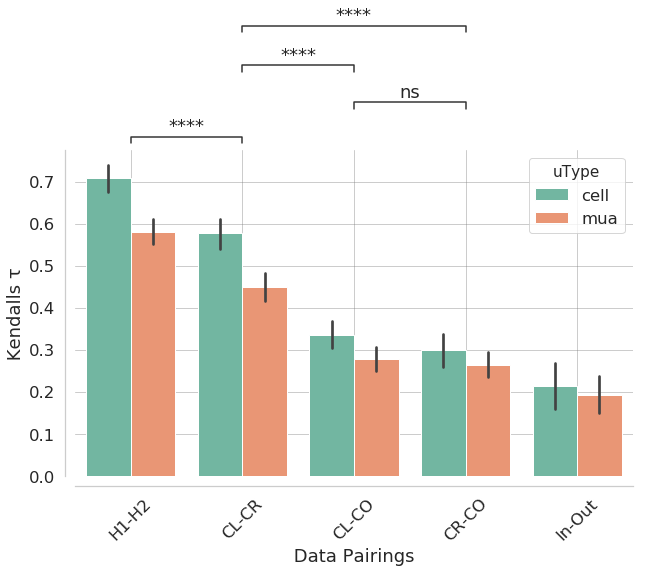

In [20]:
PF=reload(PF)
f,ax = plt.subplots(figsize=(10,6))
dat = UnitInfo
#sns.set()
sns.set_context("notebook", font_scale=1.5)
sns.axes_style('whitegrid')
#sns.catplot(x='zcPairs',y='zc',hue='uType',data=dat,kind='bar',palette="Set2",ax=ax)
ax=sns.barplot(x='zcPairs',y='zc',hue='uType',data=dat,palette="Set2",ax=ax)
PF.add_stat_annotation(ax, data=dat,x='zcPairs',y='zc',
                boxPairList=[("H1-H2","CL-CR"), ("CL-CO","CR-CO"),("CL-CR","CL-CO"), ("CL-CR","CR-CO"),],
                    test='Mann-Whitney', textFormat='star', loc='outside', verbose=1,lineYOffsetToBoxAxesCoord=0.1, lineYOffsetAxesCoord=0.02,
                    lineHeightAxesCoord=0.02, textYOffsetPoints=1,  useFixedOffset=True)
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' Kendalls τ ')
ax.set_xlabel(' Data Pairings ')
f.savefig(plotSP / 'all_units_ZoneDatCorrBox.pdf', bbox_inches='tight',pad_inches=0.2)

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



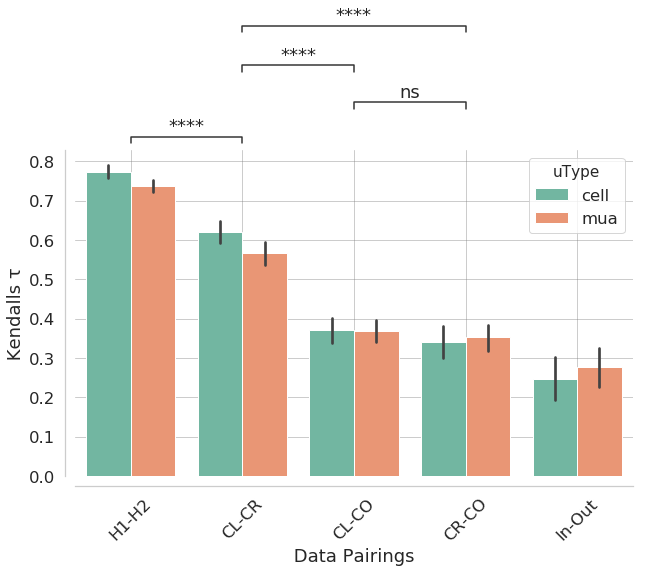

In [19]:
PF=reload(PF)
f,ax = plt.subplots(figsize=(10,6))
dat = StabUnitInfo
#sns.set()
sns.set_context("notebook", font_scale=1.5)
sns.axes_style('whitegrid')
#sns.catplot(x='zcPairs',y='zc',hue='uType',data=dat,kind='bar',palette="Set2",ax=ax)
ax=sns.barplot(x='zcPairs',y='zc',hue='uType',data=dat,palette="Set2",ax=ax)
PF.add_stat_annotation(ax, data=dat,x='zcPairs',y='zc',
                boxPairList=[("H1-H2","CL-CR"), ("CL-CO","CR-CO"),("CL-CR","CL-CO"), ("CL-CR","CR-CO"),],
                    test='Mann-Whitney', textFormat='star', loc='outside', verbose=1,lineYOffsetToBoxAxesCoord=0.1, lineYOffsetAxesCoord=0.02,
                    lineHeightAxesCoord=0.02, textYOffsetPoints=1,  useFixedOffset=True)
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' Kendalls τ ')
ax.set_xlabel(' Data Pairings ')
f.savefig(plotSP / 'stab_units_ZoneDatCorrBox.pdf', bbox_inches='tight',pad_inches=0.2)

In [686]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'font.size': 22})

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

md = smf.mixedlm("zcf ~ 0+zcPairs+uType+se", data=StabUnitInfo,groups=StabUnitInfo["unitID"])
mdf = md.fit()
print(mdf.summary())
print("R2 = {0:.3f}".format((np.corrcoef(mdf.fittedvalues,StabUnitInfo['zcf'])**2)[0,1]))

            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   zcf      
No. Observations:    1719      Method:               REML     
No. Groups:          130       Scale:                0.0863   
Min. group size:     2         Likelihood:           -453.0414
Max. group size:     29        Converged:            Yes      
Mean group size:     13.2                                     
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
zcPairs[CL-CO]       0.123    0.093  1.317 0.188 -0.060  0.305
zcPairs[CL-CR]       0.445    0.093  4.775 0.000  0.262  0.628
zcPairs[CR-CO]       0.097    0.093  1.037 0.300 -0.086  0.280
zcPairs[H1-H2]       0.743    0.093  7.966 0.000  0.560  0.925
zcPairs[In-Out]      0.026    0.093  0.280 0.780 -0.157  0.209
uType[T.mua]        -0.059    0.026 -2.228 0.026 -0.111 -0.007
se[T.

In [46]:
mdf.wald_test()

TypeError: wald_test() missing 1 required positional argument: 'r_matrix'

In [497]:
CenterSegs = ['Home','SegA','Center']
LeftSegs = ['SegE','I2','SegF','G3','SegG','G4']
RighSegs = ['SegB','I1','SegB','G1','SegC','G2']
ZoneDat[se]['FR_Zone']['Cells'][0][CenterSegs].loc[['All','CO','CL','CO']].T.mean()
ZoneDat[se]['FR_Zone']['Cells'][0][LeftSegs].loc[['All','CO','CL','CO']].T.mean()
ZoneDat[se]['FR_Zone']['Cells'][0][RighSegs].loc[['All','CO','CL','CO']].T.mean()

All    30.388325
CO     30.369983
CL     32.934814
CO     30.369983
dtype: float64

In [505]:
list(ZoneDat[se].keys())
len(ZoneDat[se]['unitIDs']['cells'])

10

In [15]:

LeftZ = ['SegE','I2','SegF','G3','SegG','G4']
#LeftZ = ['SegE','I2','SegF','SegG']

CenterZ = ['Home','SegA','Center']
RightZ = ['SegB','I1','SegB','G1','SegC','G2']
#RightZ = ['SegB','I1','SegB','SegC']


MaZones = ['LeftZ','RightZ']
nZ = len(MaZones)
Parts = ['CL','CR']
nP = len(Parts)

nReMe = nZ*nP

seCnt =0
unitCnt = 0

uTypeV = []
halfCorrV =[]
unitIDV = []

zoneV =[]
partV = []
frV = []
for se in SessionList:

    nSeCells = len(ZoneDat[se]['unitIDs']['cells'])
    nSeMua = len(ZoneDat[se]['unitIDs']['muas'])
    nSeUnits = nSeCells+nSeMua

    uTypeV+=['cell']*nSeCells*nReMe
    uTypeV+=['mua']*nSeMua*nReMe
    unitIDV+= (np.repeat(np.arange(nReMe),nSeUnits)+unitCnt).tolist()
    partV+=Parts*nZ*nSeUnits
    zoneV+=np.repeat(MaZones,nP).tolist()*nSeUnits
    
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Cells']['HalfCorr'],nReMe).tolist()
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Mua']['HalfCorr'],nReMe).tolist()
    
    for c in np.arange(nSeCells):
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]).T.mean().tolist()
    for c in np.arange(nSeMua):
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc['All']).T.mean().tolist()
        
    seCnt+=1
    unitCnt+=nSeUnits
    cellCnt+=nSeCells
    muaCnt+=nSeMua

FRZoneInfoFields = ['fr','uType','unitID','halfCorr','Partition','Zone']
FRZoneInfo=pd.DataFrame(np.zeros((0,len(FRZoneInfoFields))))
FRZoneInfo.columns=FRZoneInfoFields

FRZoneInfo['fr'] =frV
FRZoneInfo['uType'] = uTypeV
FRZoneInfo['unitID'] = unitIDV
FRZoneInfo['halfCorr'] = halfCorrV
FRZoneInfo['Partition'] = partV
FRZoneInfo['Zone'] = zoneV


In [622]:
len(frV),len(uTypeV)

(1524, 1016)

Text(0.5, 25.200000000000003, ' Zones ')

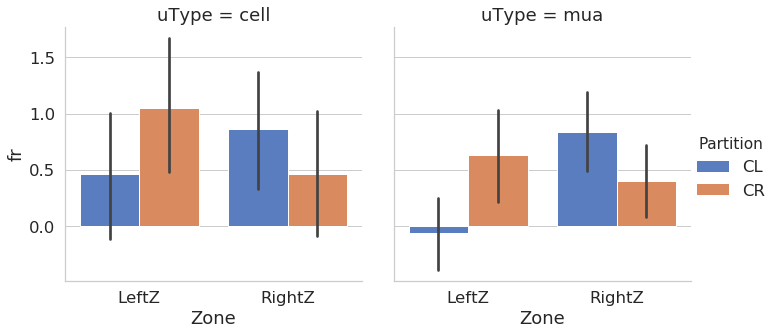

In [16]:
#f,ax = plt.subplots(figsize=(10,6))
#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
#dat = dat2
dat = FRZoneInfo
sns.set_style("whitegrid")
f=sns.catplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",kind='bar',col='uType')
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' FR ')
ax.set_xlabel(' Zones ')
#f.savefig(plotSP / 'all_units_FRZoneNoGoalsAvgByCue.pdf', bbox_inches='tight',pad_inches=0.2)
#f.savefig(plotSP / 'all_units_FRZoneGoalsAvgByCue.pdf', bbox_inches='tight',pad_inches=0.2)

In [34]:
a=dat['fr'][ (dat['Zone']=='RightZ') & (dat['Partition']=='CL')]
b=dat['fr'][ (dat['Zone']=='RightZ') & (dat['Partition']=='CR')]

stats.ttest_rel(a,b)

Ttest_relResult(statistic=5.708093514145943, pvalue=2.0357652975349238e-08)

Text(0.5, 0, ' Zones ')

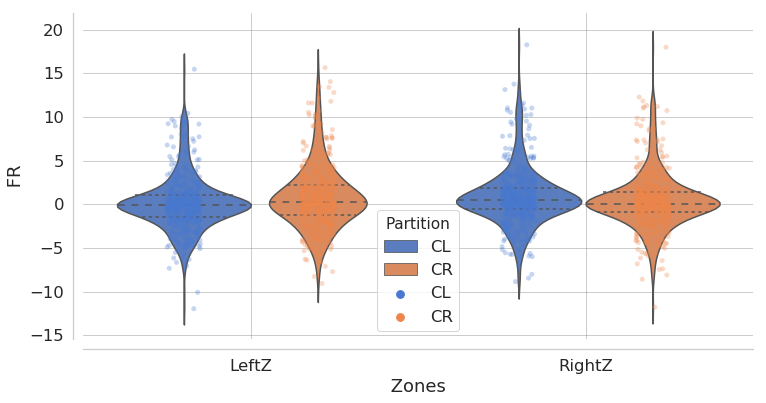

In [22]:
f,ax = plt.subplots(figsize=(12,6))
#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
#dat = dat2
dat = FRZoneInfo
sns.set_style("whitegrid")
sns.stripplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",ax=ax,dodge=True,alpha=0.3)
sns.violinplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",ax=ax,dodge=True,inner="quart",scale_hue=True)
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' FR ')
ax.set_xlabel(' Zones ')
#f.savefig(plotSP / 'all_units_FRZoneAvgByCye.pdf', bbox_inches='tight',pad_inches=0.2)

In [17]:

#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
dat2 = FRZoneInfo
md = smf.mixedlm("fr ~ 0+Partition*Zone+uType", data=dat2, groups=dat2["unitID"])
mdf = md.fit()
print(mdf.summary())
print("R2 = {0:.3f}".format((np.corrcoef(mdf.fittedvalues,dat2['fr'])**2)[0,1]))

NameError: name 'smf' is not defined

In [509]:
MaZones = ['LeftZ','CenterZ','RightZ']
nZ = 3
Parts = ['All','CO','CL','CO']
nP = 4

nReMe = nZ+nP

In [513]:
Parts*nZ*nSeUnits

['All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',
 'CL',
 'CO',
 'All',
 'CO',

In [516]:
print(ZoneDat[se]['FR_Zone']['Cells'][0][CenterSegs].loc[Parts].T.mean().tolist())
print(ZoneDat[se]['FR_Zone']['Cells'][0][LeftSegs].loc[Parts].T.mean())
print(ZoneDat[se]['FR_Zone']['Cells'][0][RighSegs].loc[Parts].T.mean())

[25.357902738417852, 26.106310093124154, 24.75924888620811, 26.106310093124154]
All    29.894047
CO     30.263968
CL     30.300783
CO     30.263968
dtype: float64
All    30.388325
CO     30.369983
CL     32.934814
CO     30.369983
dtype: float64


In [650]:

#LeftZ = ['SegE','I2','SegF','G3','SegG','G4']
LeftZ = ['G3','G4']

CenterZ = ['Home','SegA','Center']
#RightZ = ['SegB','I1','SegB','G1','SegC','G2']
RightZ = ['G1','G2']


MaZones = ['LeftZ','RightZ']
nZ = len(MaZones)
Parts = ['CL','CR']
nP = len(Parts)

nReMe = nZ*nP

seCnt =0
unitCnt = 0

uTypeV = []
halfCorrV =[]
unitIDV = []

zoneV =[]
partV = []
frV = []
for se in SessionList:

    nSeCells = len(ZoneDat[se]['unitIDs']['cells'])
    nSeMua = len(ZoneDat[se]['unitIDs']['muas'])
    nSeUnits = nSeCells+nSeMua

    uTypeV+=['cell']*nSeCells*nReMe
    uTypeV+=['mua']*nSeMua*nReMe
    unitIDV+= (np.repeat(np.arange(nReMe),nSeUnits)+unitCnt).tolist()
    partV+=Parts*nZ*nSeUnits
    zoneV+=np.repeat(MaZones,nP).tolist()*nSeUnits
    
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Cells']['HalfCorr'],nReMe).tolist()
    halfCorrV+=np.repeat(ZoneDat[se]['ZoneStability']['Mua']['HalfCorr'],nReMe).tolist()
    
    for c in np.arange(nSeCells):
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Cells'][c][RightZ].loc[Parts]).T.mean().tolist()
    for c in np.arange(nSeMua):
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Cells'][c].loc['All'].mean()).T.mean().tolist()
        frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c].loc['All'].mean()).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][LeftZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][CenterZ].loc['All']).T.mean().tolist()
        #frV+=(ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc[Parts]-ZoneDat[se]['FR_Zone']['Mua'][c][RightZ].loc['All']).T.mean().tolist()
        
    seCnt+=1
    unitCnt+=nSeUnits
    cellCnt+=nSeCells
    muaCnt+=nSeMua

FRZoneInfoFields = ['fr','uType','unitID','halfCorr','Partition','Zone']
FRZoneInfo=pd.DataFrame(np.zeros((0,len(FRZoneInfoFields))))
FRZoneInfo.columns=FRZoneInfoFields

FRZoneInfo['fr'] =frV
FRZoneInfo['uType'] = uTypeV
FRZoneInfo['unitID'] = unitIDV
FRZoneInfo['halfCorr'] = halfCorrV
FRZoneInfo['Partition'] = partV
FRZoneInfo['Zone'] = zoneV


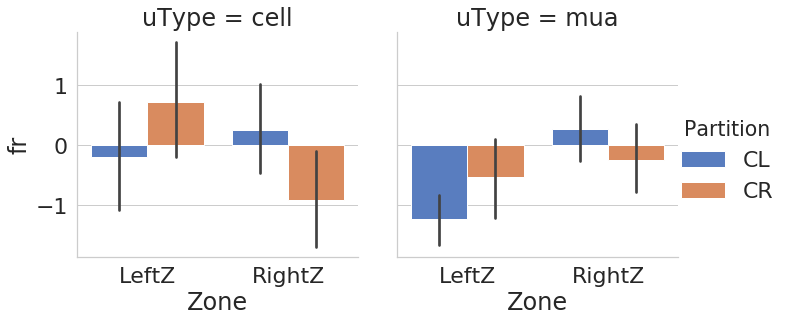

In [651]:
#f,ax = plt.subplots(figsize=(10,6))
#dat2 = FRZoneInfo.loc[FRZoneInfo['halfCorr']>0.5]
#dat = dat2
dat = FRZoneInfo
sns.set_style("whitegrid")
f=sns.catplot(x='Zone',y='fr',hue='Partition',data=dat,palette="muted",kind='bar',col='uType')
ax.grid()
sns.despine(offset=10, trim=False,ax=ax)
ax.grid(axis='both',color='grey',alpha=0.4)
ax.set_ylabel(' FR ')
ax.set_xlabel(' Zones ')
f.savefig(plotSP / 'all_units_FR_GoalsAvgByCue.pdf', bbox_inches='tight',pad_inches=0.2)

In [ ]:
FR_MajorZones = pd.DataFrame(np.zeros((0,len(Parts))))
UnitInfo.columns=UnitInfoFields

seCnt =0
unitCnt = 0
cellCnt=0
muaCnt=0
seV = []
seNumV = []

uTypeV = []
siV =[]
halfCorrV =[]
halfnRMSEV = []
zcV =[]

pairsV=[]
unitIDV = []
for se in SessionList:
    
    CellCorr = ZoneDat[se]['FR_CorrZonePairs']['Cells']
    nSeCells = CellCorr.shape[0]
    MuaCorr = ZoneDat[se]['FR_CorrZonePairs']['Mua']
    nSeMua = MuaCorr.shape[0]
    nSeUnits = nSeCells+nSeMua

    seV+=[se]*nSeUnits
    seNumV+=[seCnt]*nSeUnits
    
    uTypeV+=['cell']*nSeCells
    uTypeV+=['mua']*nSeMua
    
    unitIDV+= (np.arange(nSeUnits)+unitCnt).tolist()
    halfCorrV+=ZoneDat[se]['ZoneStability']['Cells']['HalfCorr'].tolist()
    halfCorrV+=ZoneDat[se]['ZoneStability']['Mua']['HalfCorr'].tolist()
    
    halfnRMSEV+=ZoneDat[se]['ZoneStability']['Cells']['HalfnRMSE'].tolist()
    halfnRMSEV+=ZoneDat[se]['ZoneStability']['Mua']['HalfnRMSE'].tolist()
    
    siV+=(ZoneDat[se]['SI_Zone']['Cells']['All'].tolist())
    siV+=(ZoneDat[se]['SI_Zone']['Mua']['All'].tolist())
    
    ZoneDat[se]['FR_Zone']['Cells'][0][CenterSegs].loc[Parts].T.mean()
    ZoneDat[se]['FR_Zone']['Cells'][0][LeftSegs].loc[Parts].T.mean()
    ZoneDat[se]['FR_Zone']['Cells'][0][RighSegs].loc[Parts].T.mean()
    
    seCnt+=1
    unitCnt+=nSeUnits
    cellCnt+=nSeCells
    muaCnt+=nSeMua


In [503]:
np.arange(nSeUnits)+10

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35])